# MOwNiT 
## Laboratorium 1
### Arytmetyka komputerowa



IEEE-754 Analysis http://babbage.cs.qc.cuny.edu/IEEE-754/

In [1]:
bitstring(Float32(1.0))

"00111111100000000000000000000000"

In [2]:
bitstring(Float64(1.0))

"0011111111110000000000000000000000000000000000000000000000000000"

In [3]:
# domyślnie Float64
bitstring(1.0)

"0011111111110000000000000000000000000000000000000000000000000000"

In [4]:
# Float16
bitstring(Float16(1.0))

"0011110000000000"

In [5]:
# znak, cecha, mantysa
#uwaga - w Julii tablice indeksujemy od 1
decode(x::Float32) = (b=bitstring(x); (b[1], b[2:9], b[10:32]))
decode(Float32(1.0))

('0', "01111111", "00000000000000000000000")

In [6]:
println(significand(Float32(1.0)), "*2^", exponent(Float32(1.0)))

1.0*2^0


In [7]:
# co ile liczby sa reprezentowane 
c=Float32[]
a=Float32(1.0)
r=1:10
for i=r
    push!(c, a)
    a=nextfloat(a)
end
map(x-> bitstring(x),c)

10-element Array{String,1}:
 "00111111100000000000000000000000"
 "00111111100000000000000000000001"
 "00111111100000000000000000000010"
 "00111111100000000000000000000011"
 "00111111100000000000000000000100"
 "00111111100000000000000000000101"
 "00111111100000000000000000000110"
 "00111111100000000000000000000111"
 "00111111100000000000000000001000"
 "00111111100000000000000000001001"

In [8]:
# Maszynowe epsilon mówi, jaki jest odstęp między kolejnymi liczbami zmiennoprzecinkowymi reprezentowanymi w komputerze
eps(Float32(1))

1.1920929f-7

In [9]:
eps(Float32)


1.1920929f-7

In [10]:
# Badanie postaci zdenormalizowanej. Co się dzieje, jak liczby są coraz mniejsze?
a=Float32(1.1)
for i=1:149
    a=a/Float32(2.0)
    println(decode(a), "  ", issubnormal(a))
end

('0', "01111110", "00011001100110011001101")  false
('0', "01111101", "00011001100110011001101")  false
('0', "01111100", "00011001100110011001101")  false
('0', "01111011", "00011001100110011001101")  false
('0', "01111010", "00011001100110011001101")  false
('0', "01111001", "00011001100110011001101")  false
('0', "01111000", "00011001100110011001101")  false
('0', "01110111", "00011001100110011001101")  false
('0', "01110110", "00011001100110011001101")  false
('0', "01110101", "00011001100110011001101")  false
('0', "01110100", "00011001100110011001101")  false
('0', "01110011", "00011001100110011001101")  false
('0', "01110010", "00011001100110011001101")  false
('0', "01110001", "00011001100110011001101")  false
('0', "01110000", "00011001100110011001101")  false
('0', "01101111", "00011001100110011001101")  false
('0', "01101110", "00011001100110011001101")  false
('0', "01101101", "00011001100110011001101")  false
('0', "01101100", "00011001100110011001101")  false
('0', "01101

In [11]:
# Pkg.add("Plots")
# http://docs.juliaplots.org/latest/tutorial/
using Plots

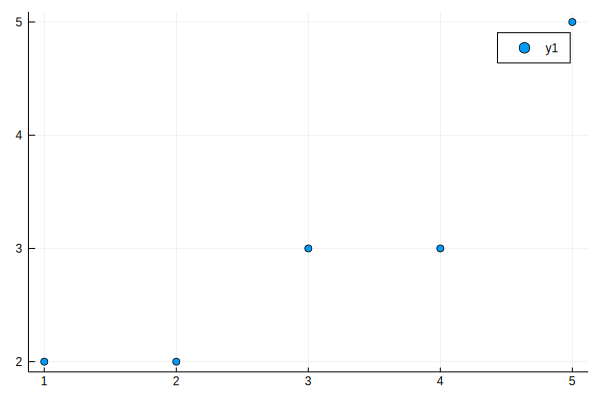

In [12]:
scatter(1:1:5, [2,2,3,3,5])

<b> Zadanie 1 </b>  Porównać w języku Julia reprezentację bitową liczby 1/3 dla Float16, Float32, Float64 oraz liczby, 
która jest inicjalizowana jako Float16, a potem rzutowana na Float64.

<b>Zadanie 2</b> Zbadać, jak zmienia się odległość między kolejnymi liczbami zminnoprzecinkowymi 
reprezentowanymi w komputerze za pomocą języka Julia. 
Narysować wykres używając Plots zależności odległości od wartości liczby dla zakresu  od 1.0 do 1000000.0.

<b>Zadanie 3</b> Jedną z bibliotek numerycznych, jaką będziemy używać na zajęciach jest <a href="http://home.agh.edu.pl/~kzajac/dydakt/mownit/lab1/gsl.html">GSL</a> (język C). Korzystając ze <a href="https://www.gnu.org/software/gsl/doc/html/ieee754.html"> wsparcia dla wyświetlania reprezentacji liczb zmiennoprzecinkowych</a> zobaczyć jak zmienia się cecha i mantysa dla coraz mniejszych liczb. Zaobserwować, kiedy matysa przestaje być znormalizowana i dlaczego?

<b>Zadanie 4</b> Na przykładzie wybranego algorytmu niestabilnego numerycznie: 
1. Pokazać, że działa źle.
2. Pokazać które konkretnie działania powodują zwiększenie błędu (np. dzielenie przez małą liczbę, cancellation).
3. Zademonstować wersję stabilną.

Wszystkie punkty przedstawić w postaci notatnika Julii.